In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm, t, shapiro, levene, bartlett, mannwhitneyu
import numpy as np
from math import sqrt, floor
import statistics

In [ ]:
satisfacion_cliente = pd.read_csv("/content/Reto1_Satisfaccion_Cliente.csv")
satisfacion_cliente

,Grupo,Satisfacción
0,A,74.967142
1,A,68.617357
2,A,76.476885
3,A,85.230299
4,A,67.658466
...,...,...
95,B,43.047276
96,B,69.441804
97,B,68.915829
98,B,65.076702


In [ ]:
satisfacion_cliente.describe()

,Satisfacción
count,100.000000
mean,66.505987
std,11.394262
min,25.703823
25%,59.197419
50%,66.722563
75%,73.516382
max,88.522782


#Analisis Exploratorio

In [ ]:
grupos = satisfacion_cliente.groupby('Grupo')

In [ ]:
grupos.describe()

Satisfacción                                                         \
             count       mean        std        min        25%        50%   
Grupo                                                                       
A             50.0  67.745261   9.336688  50.403299  61.390209  67.658548   
B             50.0  65.266713  13.114875  25.703823  57.558330  65.691204   

                             
             75%        max  
Grupo                        
A      73.362756  88.522782  
B      73.806111  88.469655

A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

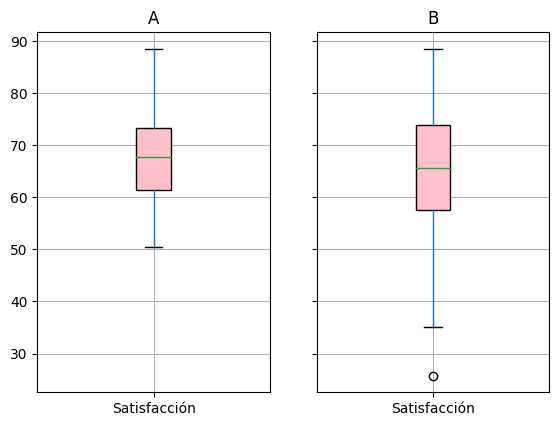

In [ ]:
grupos.boxplot(patch_artist=True, boxprops=dict(facecolor='pink'))

In [ ]:
colores = ['pink', 'blue']

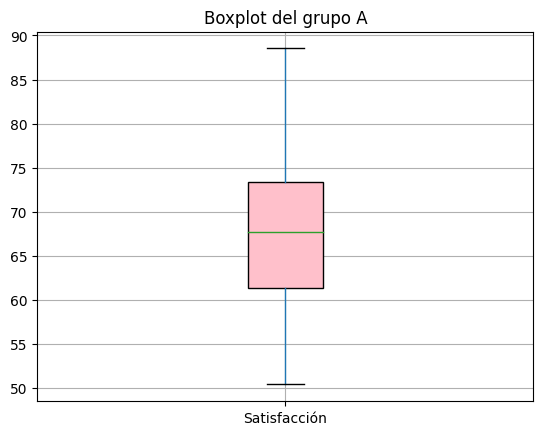

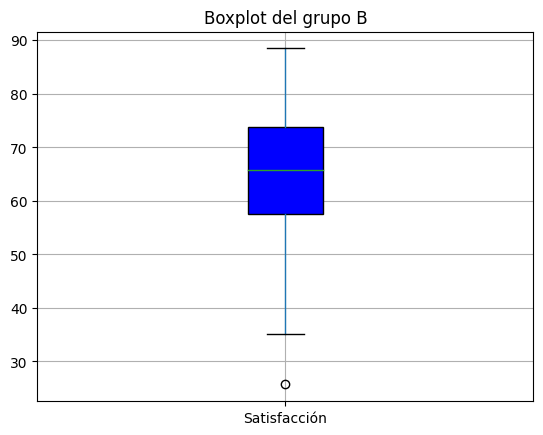

In [ ]:
for (nombre, grupo), color in zip(grupos, colores):
    grupo.boxplot(column='Satisfacción', patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(f'Boxplot del grupo {nombre}')
    plt.show()

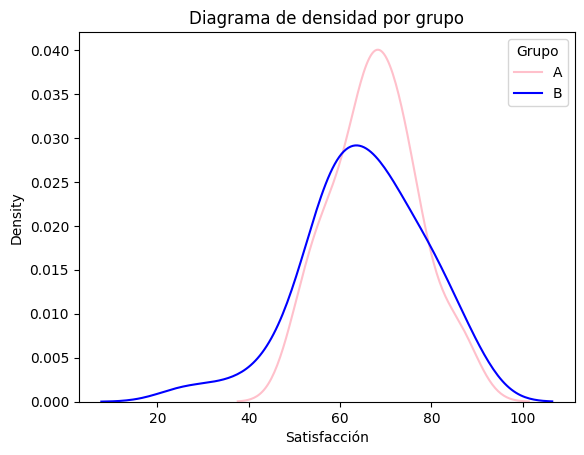

In [ ]:
for (nombre, grupo), color in zip(grupos,colores):
    sns.kdeplot(grupo['Satisfacción'], label=nombre, color=color)

plt.title('Diagrama de densidad por grupo')
plt.legend(title='Grupo')
plt.show()

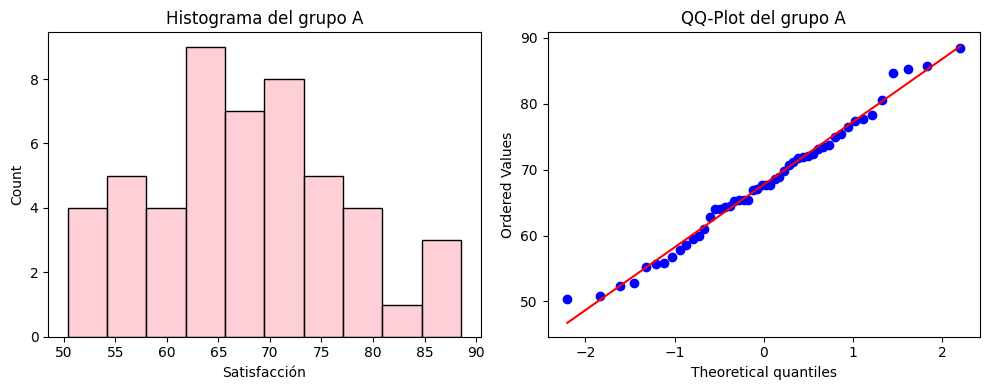

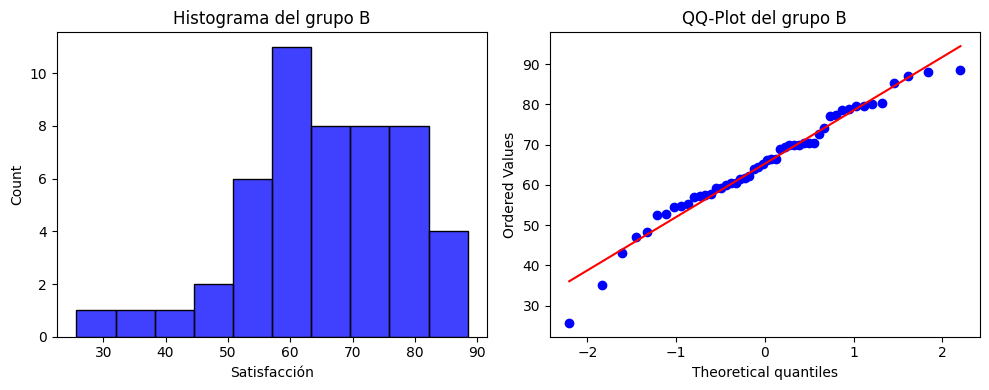

In [ ]:
for (nombre, grupo), color in zip(grupos, colores):
    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(121)
    sns.histplot(grupo['Satisfacción'], kde=False, bins=10, color= color)
    plt.title(f'Histograma del grupo {nombre}')

    # QQ-Plot
    plt.subplot(122)
    stats.probplot(grupo['Satisfacción'], plot=plt)
    plt.title(f'QQ-Plot del grupo {nombre}')

    plt.tight_layout()
    plt.show()

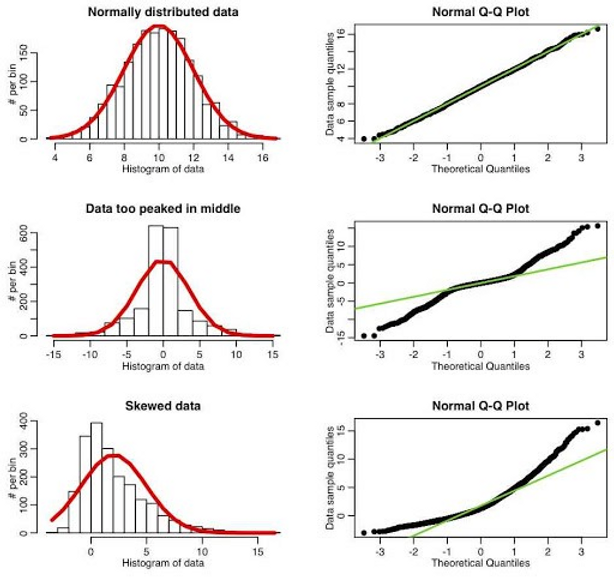

# Prueba T Student

In [ ]:
grupo_a = satisfacion_cliente[satisfacion_cliente['Grupo'] == 'A']['Satisfacción']
grupo_b = satisfacion_cliente[satisfacion_cliente['Grupo'] == 'B']['Satisfacción']

# Mostrar los primeros registros de cada grupo para verificar
print("Grupo A:")
print(grupo_a.head(10))

print("\nGrupo B:")
print(grupo_b.head(10))

Grupo A:
0    74.967142
1    68.617357
2    76.476885
3    85.230299
4    67.658466
5    67.658630
6    85.792128
7    77.674347
8    65.305256
9    75.425600
Name: Satisfacción, dtype: float64

Grupo B:
50    69.861260
51    59.223766
52    54.846170
53    74.175144
54    80.464993
55    78.969202
56    52.411737
57    60.361814
58    69.968951
59    79.633177
Name: Satisfacción, dtype: float64


## Primer Supuesto: las dos poblaciones de distribuyen normal

Para comprobar que nuestros datos provienen de una distribución normal usaremos la prueba de Shapiro Wilk

La prueba de Shapiro-Wilk es una prueba estadística utilizada para evaluar si una muestra de datos sigue una distribución normal o gaussiana. Funciona comparando los valores observados con los valores esperados bajo la hipótesis nula de normalidad.

Hipótesis nula (H0): La muestra proviene de una población con una distribución normal.

Hipótesis alternativa (H1): La muestra no proviene de una población con una distribución normal.

In [ ]:
# Verificar normalidad en el Grupo A
shapiro_test_a = shapiro(grupo_a)
print("Shapiro-Wilk test para Grupo A:", shapiro_test_a)

# Verificar normalidad en el Grupo B
shapiro_test_b = shapiro(grupo_b)
print("Shapiro-Wilk test para Grupo B:", shapiro_test_b)

Shapiro-Wilk test para Grupo A: ShapiroResult(statistic=0.9827495217323303, pvalue=0.6722097396850586)
Shapiro-Wilk test para Grupo B: ShapiroResult(statistic=0.9713166952133179, pvalue=0.26161736249923706)


Usando una significancia del 0,05
podemos ver que para ambas muestras los p-valores son mayores que la significancia. Por lo tanto no hay suficiente evidencia cientifica para rechazar la hipótesis nula, asi que ambas muestras provienen de una distribución normal.

## Segundo Supuesto: Homogeneidad de Varianzas

Para verificar el supuesto que las varianzas de los datos son iguales usaremos el test Bartlett.


La prueba de Bartlett es una prueba estadística utilizada para evaluar si las varianzas de dos o más grupos de datos son iguales. Es una prueba paramétrica que asume que los datos provienen de distribuciones normales.

Hipótesis nula (H0): Las varianzas de todos los grupos son iguales (homogeneidad de varianzas).

Hipótesis alternativa (H1): Al menos una de las varianzas es diferente.

In [ ]:
# Realizar la prueba de Bartlett
estadistica_bartlett, p_valor_bartlett = bartlett(grupo_a,grupo_b)

# Imprimir los resultados
print("Estadística de prueba de Bartlett:", estadistica_bartlett)
print("Valor p de la prueba de Bartlett:", p_valor_bartlett)

# Interpretar los resultados
nivel_significancia = 0.05
if p_valor_bartlett < nivel_significancia:
    print("Las varianzas de los grupos son diferentes (rechazamos H0)")
else:
    print("Las varianzas de los grupos son iguales (no rechazamos H0)")

Estadística de prueba de Bartlett: 5.495874887849253
Valor p de la prueba de Bartlett: 0.019061387916391257
Las varianzas de los grupos son diferentes (rechazamos H0)


Usando una significancia del 0,05 podemos ver que el p-valor es menor que la significancia. Por lo tanto hay suficiente evidencia cientifica para rechazar la hipótesis nula, las varianzas de las muestras son diferentes

 **Todos los supuestos no se cumplen, pero aún asi realizaremos la prueba**

### Prueba T con los datos originales

In [ ]:
def prueba_t_student(a,b,n_colas = 2,significancia = 0.05):
  # Calcular la media, el tamaño de la muestra, desviación estandar muestral y los grados de libertad
  media_a = np.mean(a)
  media_b = np.mean(b)
  n_a = len(a)
  n_b = len(b)
  s_a = np.std(a)
  s_b = np.std(b)
  gl = (s_a **2/n_a + s_b **2/n_b)**2 / ((1/(n_a - 1)*(s_a **2/n_a)**2) + ((1/(n_b - 1)*(s_b **2/n_b)**2)))
  #imprimir información importante
  print("Ho = Las muestras vienen de la misma población")
  print("Ha = Las muestras provienen de poblaciones diferentes")
  print(f"Medias muestrales de muestra A = {media_a}, muestra B = {media_b}")
  print(f"Tamaños de la muestra A = {n_a}, muestra B = {n_b}")
  print(f"Desviaciónes Estandar de la muestra A = {s_a}, muestra B = {s_b}")
  print(f"Grados de Libertad = {gl}")

  #
  print(f"x̄1 - x̄2 ~ N(μ^x̄1 - μ^x̄2 = μ1 - μ2,s^x̄1-x̄2 = {sqrt(s_a**2/n_a +s_b**2/n_b )})")
  print("-------------------------------------------------------------------")
  print("Valor Critico :")
  if n_colas == 2:
    # Calculamos los intervalos de confianza
    significancia_dos_colas = round(significancia/2, 3)
    t_valor = t.ppf(1 - significancia_dos_colas, gl)# Calcula el valor crítico de t
    me = abs(t_valor * sqrt(s_a**2/n_a +s_b**2/n_b ))
    d = media_a - media_b
    d_izq = round(d - me,3)
    d_der = round(d + me,3)
  #imprimir información importante
  print("significancia para dos colas = ", significancia_dos_colas)
  print("t_valor = ",t_valor)
  print("me = ",me)
  print("d = ",d)
  print(f"intervalo confianza = [{d_izq},{d_der}]")

  if d_izq < d <d_der:
        print("La diferencia de la media muestral está fuera de la zona de rechazo")
        print("Conclusión --> No hay suficiente evidencia para rechazar la Hipotesis Nula. Las muestras provienen de la misma población")
  else:
        print("La diferencia de la media muestral está en la zona de rechazo")
        print("Conclusión --> Hay suficiente evidencia para rechazar la Hipotesis Nula.  Las muestras provienen de diferentes poblaciones")

  print("-------------------------------------------------------------------")
  print("P-Valor :")
  t_valor2 = d / sqrt((s_a**2)/n_a + (s_b**2)/n_b )
  print("probabilidad acumulada = ",t.cdf(t_valor2,gl))
  p_valor = 2 * (1 - t.cdf(abs(t_valor2), gl))
  #Imprimir información importante
  print("t_valor  = ",t_valor2)
  print("p_valor = ",p_valor)

  if p_valor < significancia:
    print(p_valor,"<",significancia)
    print("Conclusión --> Hay suficiente evidencia para rechazar la Hipotesis Nula. Las muestras provienen de diferentes poblaciones")
  else:
    print(p_valor,">",significancia)
    print("Conclusión --> No hay suficiente evidencia para rechazar la Hipotesis Nula. Las muestras provienen de la misma población")


In [ ]:
prueba_t_student(grupo_a,grupo_b)

Ho = Las muestras vienen de la misma población
Ha = Las muestras provienen de poblaciones diferentes
Medias muestrales de muestra A = 67.7452609474386, muestra B = 65.2667130570193
Tamaños de la muestra A = 50, muestra B = 50
Desviaciónes Estandar de la muestra A = 9.242849378724245, muestra B = 12.983063679735192
Grados de Libertad = 88.5178049116224
x̄1 - x̄2 ~ N(μ^x̄1 - μ^x̄2 = μ1 - μ2,s^x̄1-x̄2 = 2.253842084751468)
-------------------------------------------------------------------
Valor Critico :
significancia para dos colas =  0.025
t_valor =  1.9871278522131859
me =  4.478672381099874
d =  2.478547890419293
intervalo confianza = [-2.0,6.957]
La diferencia de la media muestral está fuera de la zona de rechazo
Conclusión --> No hay suficiente evidencia para rechazar la Hipotesis Nula. Las muestras provienen de la misma población
-------------------------------------------------------------------
P-Valor :
probabilidad acumulada =  0.8627774358093039
t_valor  =  1.0996990016239772


**Ya que los supuestos no se cumplieron trataremos de ver una forma de ajustar los datos y ver si podemos transformarlos para intentar cumplir los supuestos**

##Prueba T con los datos transformados

Transformación inversa:
La transformación inversa es útil cuando los datos están sesgados hacia valores más bajos. Puedes aplicar la inversión de tus datos restando cada valor de un número constante o dividiéndolo por un número constante.
python

Como pudimos ver en el Análisis exploratorio, se puede observar que el grupo b esta sesgado, por lo tanto decidimos por esta razón transformar los datos con el método "Transformación inversa".

In [ ]:
# Aplicar transformación inversa
constante = 100
grupo_b_transformado = constante - np.array(grupo_b)

grupo_a_transformado = constante - np.array(grupo_a)

print("Datos originales:", grupo_b)
print("Datos transformados (inversa):", grupo_b_transformado)

Datos originales: 50    69.861260
51    59.223766
52    54.846170
53    74.175144
54    80.464993
55    78.969202
56    52.411737
57    60.361814
58    69.968951
59    79.633177
60    57.812386
61    62.215115
62    48.404975
63    47.056901
64    77.187887
65    85.343600
66    63.919848
67    80.052993
68    70.424540
69    55.323204
70    70.420934
71    88.070548
72    64.462609
73    88.469655
74    25.703823
75    77.328538
76    66.305706
77    60.514890
78    66.376412
79    35.186466
80    61.704922
81    70.356689
82    87.168411
83    57.225947
84    52.872596
85    57.473644
86    78.731032
87    69.931267
88    57.053597
89    72.699011
90    66.456163
91    79.529675
92    54.469204
93    60.085068
94    59.118378
95    43.047276
96    69.441804
97    68.915829
98    65.076702
99    61.481193
Name: Satisfacción, dtype: float64
Datos transformados (inversa): [30.13874046 40.77623421 45.15383    25.82485567 19.53500716 21.03079821
 47.58826285 39.63818564 30.03104853 20.366

#### Supuestos con los datos transformados



In [ ]:
# Verificar normalidad en el Grupo A
shapiro_test_a = shapiro(grupo_a_transformado)
print("Shapiro-Wilk test para Grupo A:", shapiro_test_a)

# Verificar normalidad en el Grupo B
shapiro_test_b = shapiro(grupo_b_transformado)
print("Shapiro-Wilk test para Grupo B:", shapiro_test_b)

Shapiro-Wilk test para Grupo A: ShapiroResult(statistic=0.9827495217323303, pvalue=0.6722097396850586)
Shapiro-Wilk test para Grupo B: ShapiroResult(statistic=0.9713165163993835, pvalue=0.2616133987903595)


La prueba de Shapiro Wilk sigue diciendonos que los datos se distribuyen normal.

In [ ]:
from scipy.stats import levene

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
levene_test = levene(grupo_a, grupo_b_transformado)
print("Prueba de Levene para homogeneidad de varianzas:", levene_test)

Prueba de Levene para homogeneidad de varianzas: LeveneResult(statistic=4.030456271317731, pvalue=0.04743905991523835)


In [ ]:
from scipy.stats import bartlett
# Realizar la prueba de Bartlett
estadistica_bartlett, p_valor_bartlett = bartlett(grupo_a_transformado,grupo_b_transformado)

# Imprimir los resultados
print("Estadística de prueba de Bartlett:", estadistica_bartlett)
print("Valor p de la prueba de Bartlett:", p_valor_bartlett)

# Interpretar los resultados
nivel_significancia = 0.05
if p_valor_bartlett < nivel_significancia:
    print("Las varianzas de los grupos son diferentes (rechazamos H0)")
else:
    print("Las varianzas de los grupos son iguales (no rechazamos H0)")


Estadística de prueba de Bartlett: 5.495874887849253
Valor p de la prueba de Bartlett: 0.019061387916391257
Las varianzas de los grupos son diferentes (rechazamos H0)


Apesar de transformar los datos, la prueba Bartlett nos sigue diciendo que las varinzas son diferentes.

In [ ]:
prueba_t_student(grupo_a_transformado,grupo_b_transformado)

Ho = Las muestras vienen de la misma población
Ha = Las muestras provienen de poblaciones diferentes
Medias muestrales de muestra A = 32.2547390525614, muestra B = 34.73328694298071
Tamaños de la muestra A = 50, muestra B = 50
Desviaciónes Estandar de la muestra A = 9.242849378724245, muestra B = 12.98306367973519
Grados de Libertad = 88.51780491162242
x̄1 - x̄2 ~ N(μ^x̄1 - μ^x̄2 = μ1 - μ2,s^x̄1-x̄2 = 2.253842084751468)
-------------------------------------------------------------------
Valor Critico :
significancia para dos colas =  0.025
t_valor =  1.9871278522131859
me =  4.478672381099874
d =  -2.478547890419314
intervalo confianza = [-6.957,2.0]
La diferencia de la media muestral está fuera de la zona de rechazo
Conclusión --> No hay suficiente evidencia para rechazar la Hipotesis Nula. Las muestras provienen de la misma población
-------------------------------------------------------------------
P-Valor :
probabilidad acumulada =  0.137222564190694
t_valor  =  -1.099699001623986

La Prueba T nos dan los mismos resultados, transformar los datos no nos mostró ningun cambio.

# Prueba U de Mann-Whitney

Supuestos:

1. La variable dependiente debe medirse a nivel ordinal o continuo

2. La variable independiente debe consistir en dos grupos

3. Debe haber independencia de las observaciones de cada grupo

4. Las dos variables se distribuyen de forma anormal

5. Distribución de los datos: No se requiere que los datos sigan una distribución normal1. Sin embargo, bajo la hipótesis nula, se asume que la distribución de partida de ambos grupos es la misma


H0 = no hay diferencia (en términos de tendencia central) entre los dos grupos de la población

H1 = existe una diferencia (con respecto a la tendencia central) entre los dos grupos de la población

### Revisión del supuesto sobre la similaridad de la distribución de ambos grupos.

In [ ]:
# Realizar la prueba de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(satisfacion_cliente[satisfacion_cliente['Grupo'] == 'A']['Satisfacción'], satisfacion_cliente[satisfacion_cliente['Grupo'] == 'B']['Satisfacción'])

# Imprimir los resultados
print("Estadística de prueba:", statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.")
else:
    print("Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.")

Estadística de prueba: 0.18
Valor p: 0.3959398631708505
No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.


Tanto este como los demás supuestos se cumplen, entonces es posible hacer la prueba U de Mann-Whitney sin realizarle transformaciones a los datos.

### Código de la prueba

In [ ]:
satisfaccion_ordenada = satisfacion_cliente.sort_values(by='Satisfacción', ascending=True)
satisfaccion_ordenada['Rango_Satisfacción'] = range(1, len(satisfaccion_ordenada) + 1)

In [ ]:
satisfaccion_ordenada

,Grupo,Satisfacción,Rango_Satisfacción
74,B,25.703823,1
79,B,35.186466,2
95,B,43.047276,3
63,B,47.056901,4
62,B,48.404975,5
...,...,...,...
6,A,85.792128,96
82,B,87.168411,97
71,B,88.070548,98
73,B,88.469655,99


In [ ]:
grupo_A, grupo_B= 0, 0
for i, k in zip(satisfaccion_ordenada['Grupo'], satisfaccion_ordenada['Rango_Satisfacción']) :
    if i == 'A': grupo_A+= k
    elif i == 'B': grupo_B+= k

u_A = (50*50 + (50*(50+1))/2) - grupo_A
u_B = (50*50 + (50*(50+1))/2 )- grupo_B

valor_esperado = (50*50)/2

error_estadar = (((50*50)*(50+50+1))/12)**(1/2)

z_valor = (min(grupo_A, grupo_B) - valor_esperado)/ error_estadar
p_valor = mannwhitneyu(satisfaccion_ordenada[satisfaccion_ordenada['Grupo'] == 'A']['Satisfacción'],satisfaccion_ordenada[satisfaccion_ordenada['Grupo'] == 'B']['Satisfacción']).pvalue

print('Estadístico de prueba (Valor Z):', z_valor)
print('P-Valor:', p_valor)

if p_valor < 0.05: print('Se rechaza la H0: Hay suficiente evidencia estadisca para decir que la satisfacion de los dos grupos es distinta')
else: print('No se rechaza la H0: No hay suficiente evidencia estadisca para decir que la satisfacion de los dos grupos es distinta')

Estadístico de prueba (Valor Z): 7.920999036900223
P-Valor: 0.38694307714460696
No se rechaza la H0: No hay suficiente evidencia estadisca para decir que la satisfacion de los dos grupos es distinta
